In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from kid_readout.utils import readoutnc

In [3]:
import glob

In [ ]:
!l

In [5]:
fns = glob.glob('/artemis/readout/2016-03-11_*_scan_lo_*.nc')
#fns += glob.glob('/artemis/readout/2016-03-11_*_scan_lo_*MHz_mmw_on.nc')
print fns

['/artemis/readout/2016-03-11_155915_scan_lo_1010.0_MHz_mmw_on.nc', '/artemis/readout/2016-03-11_160911_scan_lo_1200.0_MHz_mmw_on.nc', '/artemis/readout/2016-03-11_161907_scan_lo_1390.0_MHz_mmw_on.nc', '/artemis/readout/2016-03-11_162904_scan_lo_1580.0_MHz_mmw_on.nc', '/artemis/readout/2016-03-11_163901_scan_lo_1770.0_MHz_mmw_on.nc', '/artemis/readout/2016-03-11_164902_scan_lo_1960.0_MHz_mmw_on.nc', '/artemis/readout/2016-03-11_182233_scan_lo_1010.0_MHz_mmw_modulated_5_5_turns.nc', '/artemis/readout/2016-03-11_183231_scan_lo_1200.0_MHz_mmw_modulated_5_5_turns.nc', '/artemis/readout/2016-03-11_184238_scan_lo_1390.0_MHz_mmw_modulated_5_5_turns.nc', '/artemis/readout/2016-03-11_185250_scan_lo_1580.0_MHz_mmw_modulated_5_5_turns.nc', '/artemis/readout/2016-03-11_190258_scan_lo_1770.0_MHz_mmw_modulated_5_5_turns.nc', '/artemis/readout/2016-03-11_191310_scan_lo_1960.0_MHz_mmw_modulated_5_5_turns.nc']


In [6]:
rncs = [readoutnc.ReadoutNetCDF(fn) for fn in fns]

/artemis/readout/2016-03-11_155915_scan_lo_1010.0_MHz_mmw_on.nc
/artemis/readout/2016-03-11_160911_scan_lo_1200.0_MHz_mmw_on.nc
/artemis/readout/2016-03-11_161907_scan_lo_1390.0_MHz_mmw_on.nc
/artemis/readout/2016-03-11_162904_scan_lo_1580.0_MHz_mmw_on.nc
/artemis/readout/2016-03-11_163901_scan_lo_1770.0_MHz_mmw_on.nc
/artemis/readout/2016-03-11_164902_scan_lo_1960.0_MHz_mmw_on.nc
/artemis/readout/2016-03-11_182233_scan_lo_1010.0_MHz_mmw_modulated_5_5_turns.nc
/artemis/readout/2016-03-11_183231_scan_lo_1200.0_MHz_mmw_modulated_5_5_turns.nc
/artemis/readout/2016-03-11_184238_scan_lo_1390.0_MHz_mmw_modulated_5_5_turns.nc
/artemis/readout/2016-03-11_185250_scan_lo_1580.0_MHz_mmw_modulated_5_5_turns.nc
/artemis/readout/2016-03-11_190258_scan_lo_1770.0_MHz_mmw_modulated_5_5_turns.nc
/artemis/readout/2016-03-11_191310_scan_lo_1960.0_MHz_mmw_modulated_5_5_turns.nc


(-65, -25)

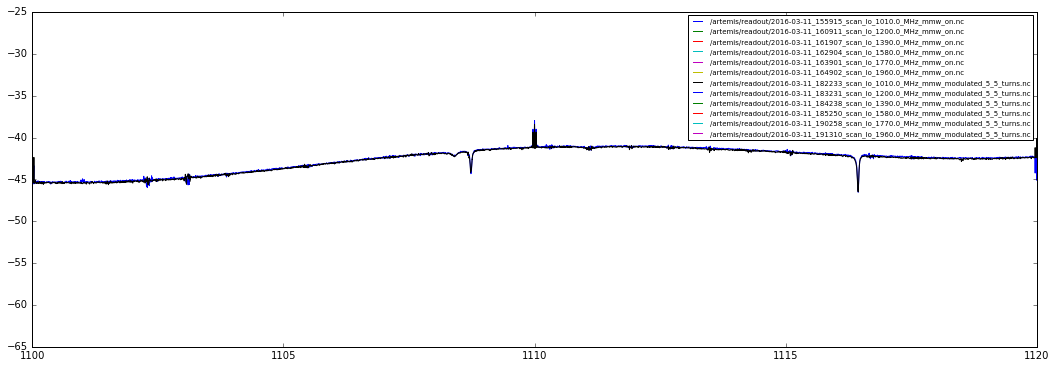

In [53]:
figure(figsize=(18,6))
for rnc in rncs:
    if rnc.sweeps:
        print rnc.filename
        fr = rnc.sweeps[0].frequency[:]
        s21 = rnc.sweeps[0].s21[:]
        plot(fr,20*np.log10(np.abs(s21)),label=rnc.filename)
xlim(1100,1120)
legend(prop=dict(size='x-small'))
#xlim(1135,1165)
ylim(-65,-25)

In [39]:
f0s = np.load('/artemis/readout/resonances/2016-02-24-jpl-park-2015-10-40nm-al-niobium-gp-two-groups.npy')

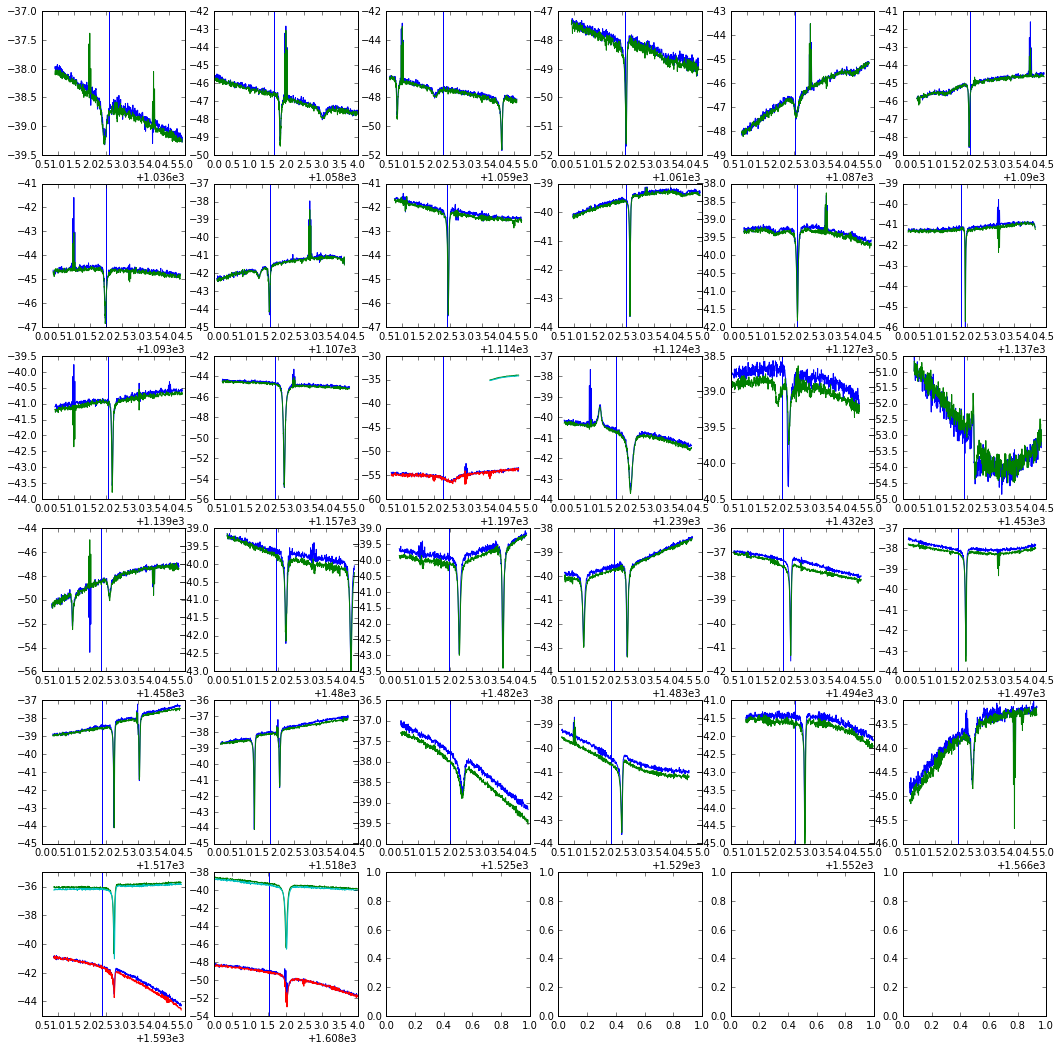

In [45]:
fig,axs = subplots(6,6,figsize=(18,18))
for k in range(32):
    ax = axs.flatten()[k]
    f0 = f0s[k]
    ax.axvline(f0*.9997)
    for rnc in rncs:
        if rnc.sweeps:
            fr = rnc.sweeps[0].frequency[:]
            s21 = rnc.sweeps[0].s21[:]
            mask = np.abs(f0-fr) < 2.0
            if np.any(mask):
                ax.plot(fr[mask],20*np.log10(np.abs(s21[mask])))

In [20]:
rncmod = rncs[6:]

In [26]:
fr.shape

(32768,)

In [27]:
response.shape

(32,)

In [28]:
fold.shape

(32, 256)

/artemis/readout/2016-03-11_182233_scan_lo_1010.0_MHz_mmw_modulated_5_5_turns.nc
/artemis/readout/2016-03-11_183231_scan_lo_1200.0_MHz_mmw_modulated_5_5_turns.nc
/artemis/readout/2016-03-11_184238_scan_lo_1390.0_MHz_mmw_modulated_5_5_turns.nc
/artemis/readout/2016-03-11_185250_scan_lo_1580.0_MHz_mmw_modulated_5_5_turns.nc
/artemis/readout/2016-03-11_190258_scan_lo_1770.0_MHz_mmw_modulated_5_5_turns.nc
/artemis/readout/2016-03-11_191310_scan_lo_1960.0_MHz_mmw_modulated_5_5_turns.nc


(1400, 1450)

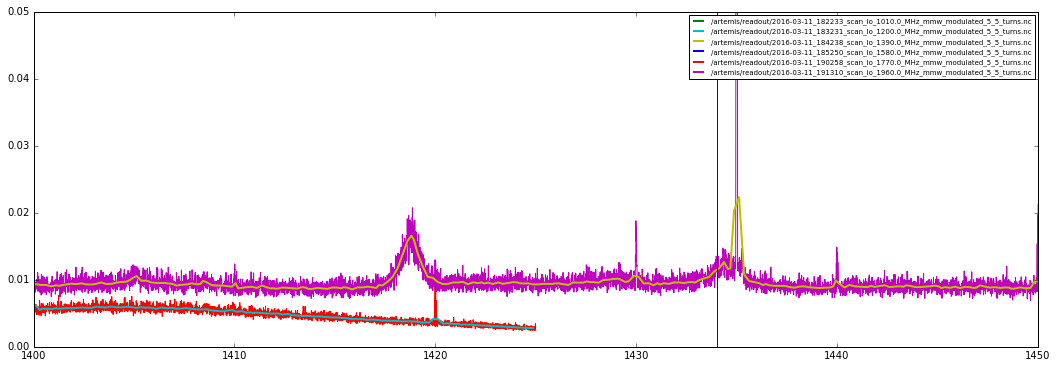

In [54]:
figure(figsize=(18,6))
for rnc in rncmod:
    if rnc.sweeps:
        print rnc.filename
        fr = rnc.sweeps[0].frequency[:]
        data = rnc.sweeps[0].timestream_group.data[:]
        fold = data.reshape((32768,-1,256)).mean(1)
        fold = fold-fold.mean(1)[:,None]
        response = fold.real.ptp(1)+fold.imag.ptp(1)
        plot(fr,response)
        response = response.reshape((-1,32)).mean(1)
        fr = fr.reshape((-1,32)).mean(1)
        plot(fr,response,label=rnc.filename,lw=2)
xlim(1100,1120)
axvline(1038)
axvline(1434)
ylim(0,0.05)
legend(prop=dict(size='x-small'))
#xlim(1135,1165)
#ylim(-65,-25)
xlim(1400,1450)

In [9]:
res_group_1 = np.array([1236.82,
                       1248.3,
                       1261.03,
                       1261.13,
                       1261.29,
                       1264.08,
                       1284.17,
                       1291.2,
                       1299.91,
                       1306.11,
                       1307.8,
                       1314.58,
                       1315.93,
                       1324.07,
                       1335.12,
                       1335.41, # double
                       1344.81,
                       1348.71,
                       1356.01,
                       1365.03,
                       1370.4,
                       1387.77,
                       1406.3,
                       ])
res_group_2 = np.array([1783.49,
                       1796.33,
                       1806.02,
                       1835.13,
                       1850.03,
                       1874.24,
                       1875.75,
                       1878.46,
                       1882.0,
                       1894.45,
                       1904.79,
                       1916.06,
                       1919.58,
                       1936.27,
                       1948.01,
                       1958.88,
                       1974.2,
                       1982.54,
                       1986.58,
                       2014.7,
                       ])

In [ ]:
res_group_1.shape

In [ ]:
res_group_2.shape

In [ ]:
f0 = (1783+1406)/2.

In [ ]:
f0+255, f0-256